In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv(r"E:\SE\zzz\AI\proj\weather.csv")

In [97]:
df.shape


(1461, 6)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<Figure size 1400x800 with 0 Axes>

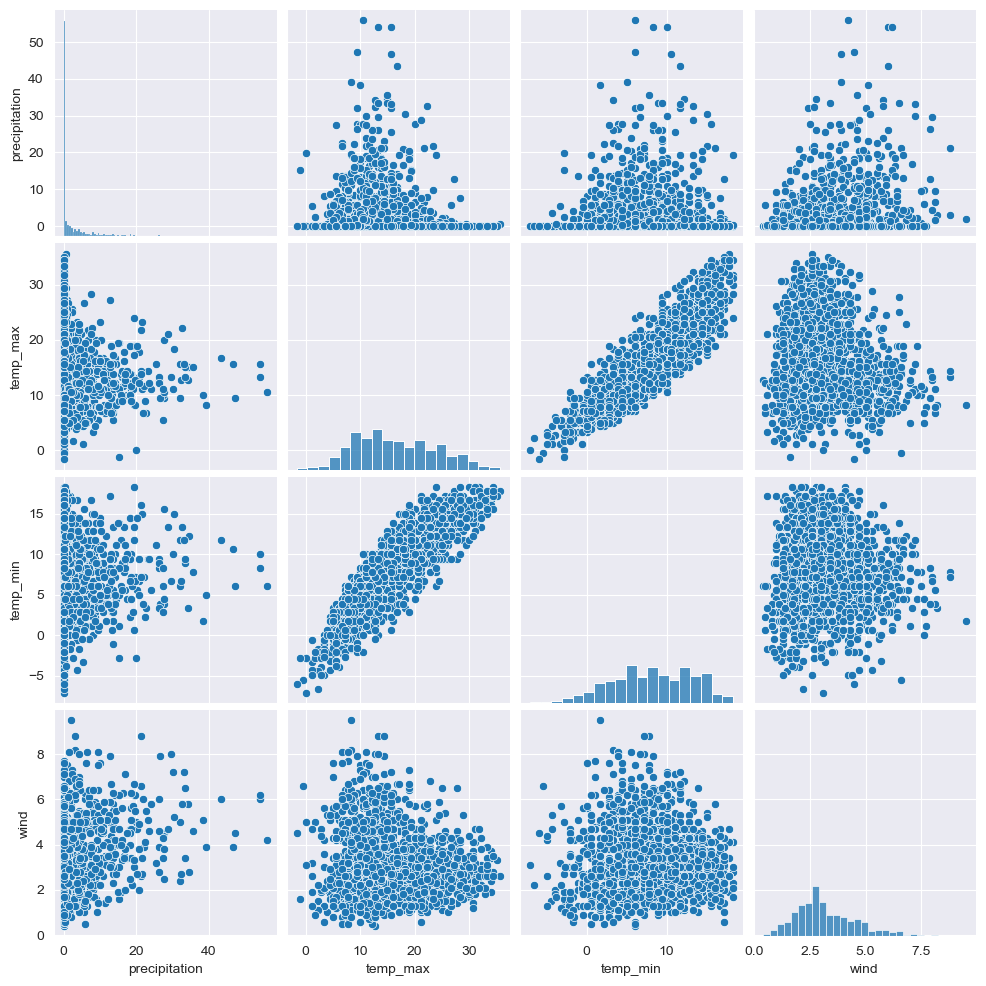

In [54]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop(['date','weather'],axis=1))
plt.show()

In [55]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("weather")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [56]:
from datetime import datetime
xs,ys=df.shape
i=0
while i < xs:
    converted = pd.to_datetime(df.loc[i,'date'])
    df.at[i, 'date'] = datetime.timestamp(converted)
    i += 1
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1325404800.0,0.0,12.8,5.0,4.7,0
1,1325491200.0,10.9,10.6,2.8,4.5,2
2,1325577600.0,0.8,11.7,7.2,2.3,2
3,1325664000.0,20.3,12.2,5.6,4.7,2
4,1325750400.0,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1451203200.0,8.6,4.4,1.7,2.9,2
1457,1451289600.0,1.5,5.0,1.7,1.3,2
1458,1451376000.0,0.0,7.2,0.6,2.6,1
1459,1451462400.0,0.0,5.6,-1.0,3.4,4


In [57]:
x = df.drop('weather',axis=1)
y = df['weather']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [59]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #preventing features with larger scales from dominating those with smaller scales
X_test = sc.transform(X_test)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [61]:
y_pred = classifier.predict(X_test)

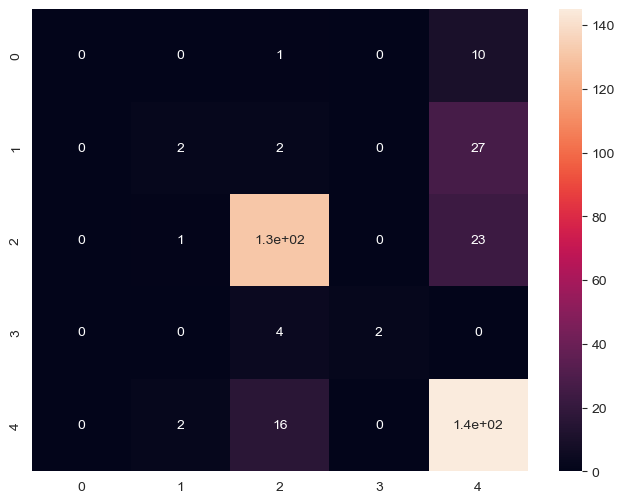

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [63]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7650273224043715


# SVM

In [64]:
from sklearn.svm import SVC  # Support Vector Machine classifier
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result

In [65]:
y_pred = classifier.predict(X_test)

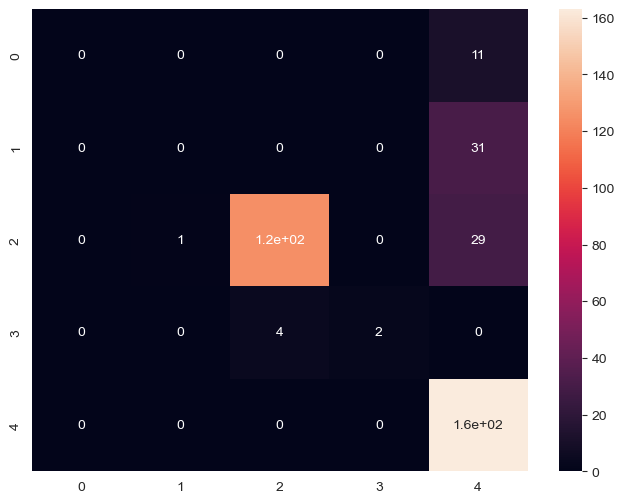

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()


In [67]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7923497267759563


# Training the K-NN model on the Training set

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


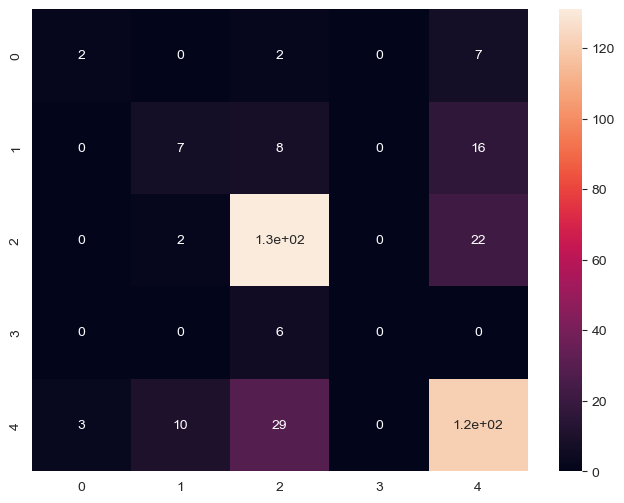

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [71]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.7131147540983607


# Training the Naive Bayes on the Training set

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [73]:
y_pred = classifier.predict(X_test)

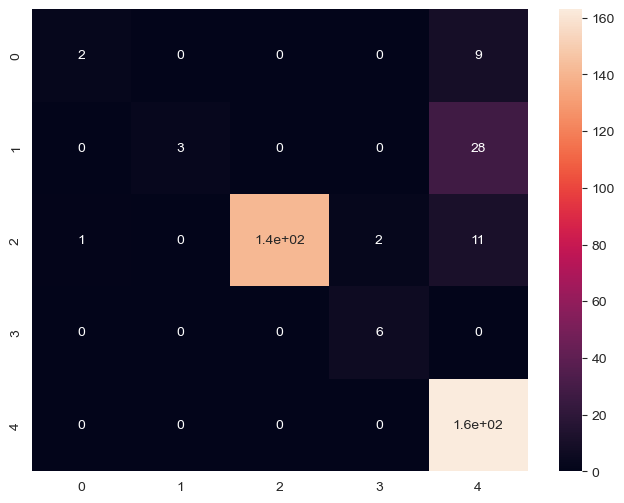

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [75]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.860655737704918


# Training Decision Tree Classification on Train set

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
y_pred = classifier.predict(X_test)

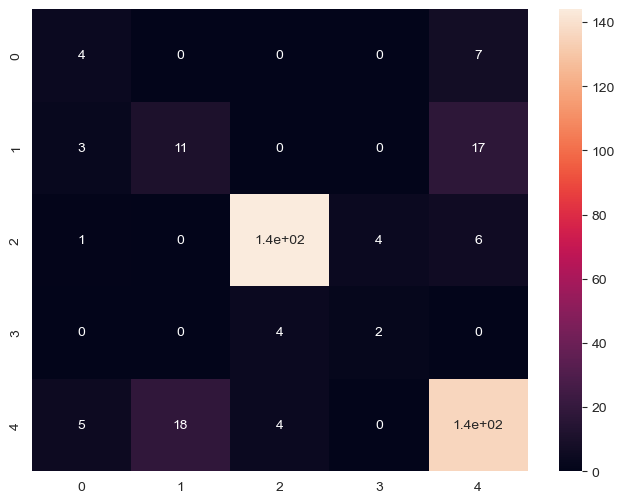

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [79]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.8114754098360656


# Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)


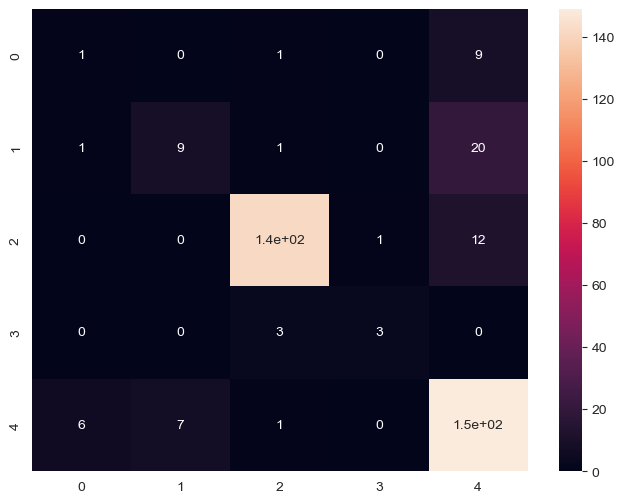

In [81]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [90]:
from sklearn.metrics import classification_report


In [83]:
acc6 = forest.score(X_test,y_test)
print(acc6)

0.8306010928961749


# Training XGBoost on the Training set

In [84]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [85]:
y_pred = classifier.predict(X_test)

# Making confusion matrix

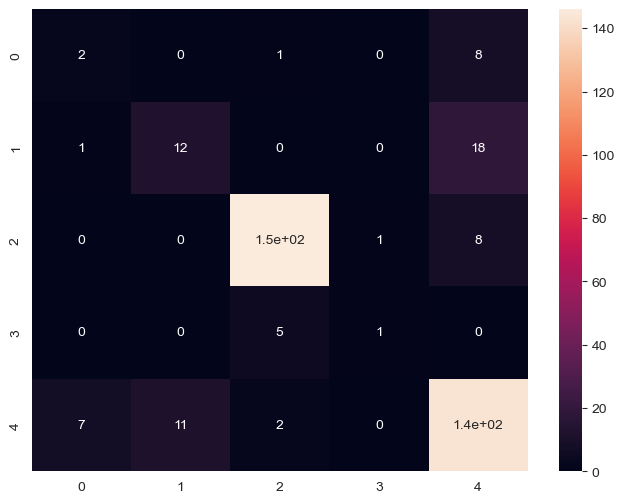

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc7 = accuracy_score(y_test, y_pred)
print(acc7)

0.8306010928961749


# Create visualization for all model with their Accuracy

C:\Users\ok\AppData\Local\Temp\ipykernel_7028\3860968744.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)


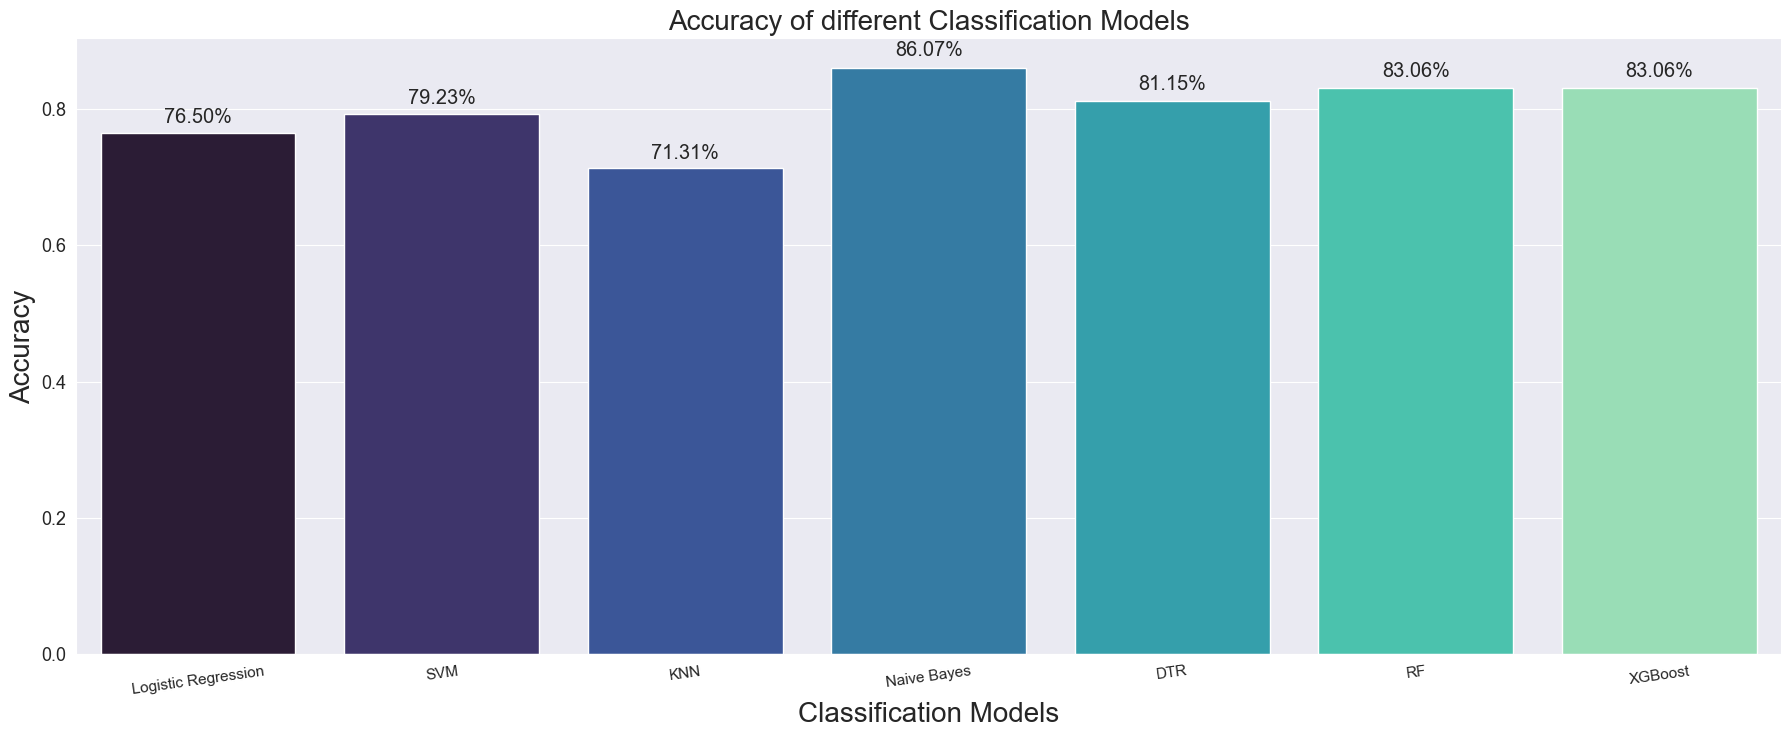

In [88]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [99]:
date = input("Enter a date: ")
precipitation = input("Enter precipitation: ")
temp_max = input("Enter max temperature: ")
temp_min = input("Enter min temperature: ")
wind = input("Enter wind speed: ")

input_data = np.array([[date, precipitation, temp_max, temp_min, wind]])

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_data)

# Convert date to timestamp
converted = pd.to_datetime(input_df.loc[0, 0])  #coverts to date oject
input_df.at[0, 0] = datetime.timestamp(converted) #coverts to timestamp

# Predict using the model
classifier = GaussianNB()
classifier.fit(X_train, y_train)#train


y_pred = classifier.predict(input_df) #predict
[2]
# Print prediction
lists=['drizzle','fogy','rainy','snow','sun']
print("The predicted day will be:", lists[y_pred[0]])


Enter a date: 2024-04-21
Enter precipitation: 3
Enter max temperature: 34
Enter min temperature: 24
Enter wind speed: 3
The predicted day will be: rainy
